In [4]:
# let's see what ROME has for us
import os 
import pandas as pd
HOME = os.getcwd()
ROME_DATA = os.path.join(HOME,'rome_data')
ROME_REVIEWS = os.path.join('rome.csv')

In [5]:
rome = pd.read_csv(ROME_REVIEWS)

In [7]:
rome.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional..."


In [6]:
import random
from random import sample
random.seed(11)
s_3 = rome['scores' > 0.9]
s_2 = rome[(rome['scores'] >= 0.6) & (rome['scores'] < 0.9)]
s_1 = rome[rome['scores'] < 0.6]

s3 = sample(s_3, 5)
print(s1)

TypeError: '>' not supported between instances of 'str' and 'float'

In [2]:
! pip install langdetect


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from langdetect import detect
detect("War doesn't show who's right, just who's left.")

'en'

In [4]:
from langdetect import DetectorFactory
DetectorFactory.seed = 0

In [5]:
from translate import Translator
translator= Translator(from_lang="german",to_lang="english")
translation = translator.translate("Guten Morgen")
print(translation)

Good morning


In [6]:
! pip install pyspellchecker
! pip install langcodes[data]


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
import re

SPELL = SpellChecker()

punc = r'[#%&\(\)\*\+,\/:;<=>@\[\\\]\^_`{\|}~\$-]+' # kept all possibly-meaningfl

punc_complete = r'[!\"#\$%&\'\(\)\*\+,\.\/:;<=>\?@\[\]\^_`{\|}~-]+'


def is_english(processed_text):
    try:
        # use a word tokenizer
        tokens = word_tokenize(processed_text)
        tokens = [t for t in tokens if re.match(t, punc_complete) is None]
    except:        
        return True

    total_length = len(tokens)
    mis_length = 0

    for i in range(0, len(tokens), 10):
        mis_length += len(SPELL.unknown(tokens[i: i + 10]))
        if mis_length >= 0.2 * total_length:
            return False
    
    return True

In [8]:

from translate import Translator
translator= Translator(from_lang="german",to_lang="english")
translation = translator.translate("Guten Morgen")

ESP_TRANSLATE = Translator(from_lang="spanish",to_lang="english")
DE_TRANSLATE = Translator(from_lang='german', to_lang='english')

In [9]:
from deep_translator import GoogleTranslator
from nltk.tokenize import word_tokenize
import re # for regex manipulation
# first let's embed some text data


from langcodes import Language
import nltk
from nltk.corpus import stopwords
STOP_WORDS = set(stopwords.words('english'))

URL_REGEX = r'((([A-Za-z]{3,9}:(?:\/\/)?)(?:[-;:&=\+\$,\w]+@)?[A-Za-z0-9.-]+|(?:www.|[-;:&=\+\$,\w]+@)[A-Za-z0-9.-]+)((?:\/[\+~%\/.\w_-]*)?\??(?:[-\+=&;%@.\w_]*)#?(?:[\w]*))?)'

# this function is needed for 
def clean_text(text):
    if text is None: 
        return 
    
    # a minimal data processing
    text = text.lower().strip()
    # remove any non desirable characters: 
    text = re.sub(punc, '', text)
    # remove extra spaces
    text = re.sub(r'(\s+)(<\s*br\s*>)', ' ', text)
    return text

TRANSLATOR = GoogleTranslator(source='auto', target='en') 

def prepare_comment_scoring(text: str):
    # first of all clean the text
    text = clean_text(text)
    # first detect if it is in the english language
    if is_english(text[:100]): # first 100 characters should be enough to determine whether the text is english or not.
        return text
    return None

    res = TRANSLATOR.translate(text)
    return res 

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# create the scores out of the actual text comments

SID = SentimentIntensityAnalyzer()

def sentiment_score(text: str, analyser=None):
    if analyser is None:
        analyser = SID
    return analyser.polarity_scores(str(text))['compound']

# let's add the sentiment scores for a city reviews
def add_sentiment_scores(reviews_df: pd.DataFrame, save_path: str=None, limit:int=None):
    # first extract the actual reviews from the dataframe
    scores_df = pd.DataFrame(data={"scores":[(sentiment_score(clean_text(str(x))) if is_english(clean_text(str(x))[100:]) else None) for x in reviews_df['comments'].iloc[:(limit if limit else -1)]]})    
    scores_df.dropna(subset='scores', inplace=True)
    res =  pd.concat([reviews_df, scores_df], ignore_index=False, axis=1)
    if save_path:
        res.to_csv(save_path, index=False)
    return res


In [11]:
mexico_reviews = pd.read_csv('mexico.csv')
# test the comment preparation with spanish

In [12]:
# r = add_sentiment_scores(mexico_reviews, limit=10000)
# r.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores
0,44616,706908,2011-11-09,634733,Lindsay,Forget staying in a hotel. Stay at condesa hau...,0.8805
1,2056638,9623913,2014-01-03,6743067,Nora Carolina,"El sitio es precioso, está muy bien ubicado al...",NaN
2,2056638,10085314,2014-01-29,267280,Andres,The host are amazing!!!!... The whole family i...,0.8946
3,44616,2006160,2012-08-16,3087087,Samuel,"Fantastic location, great place, friendly host...",0.9529
4,44616,3174954,2012-12-28,3234920,Anna,I would highly recommend Condesa Haus for anyo...,0.9868


In [18]:
# let's set this once and for all
def join_no_agg(listings: pd.DataFrame, reviews_df: pd.DataFrame, city: str):
    # first select the columns needed 
    reviews_df = reviews_df[['listing_id', 'scores', 'date', 'comments']] #, 'host_id']].rename(columns={"host_id": 'host'})
    # extract the city from the reviews dataframe
    listings = listings[listings['city'] == city]
    listings = listings.merge(reviews_df, how='inner', on='listing_id', )
    return  listings.dropna(subset=['scores'])

In [14]:
METADATA_LOC = os.path.join('Airbnb Data', 'Reviews.csv')
LISTINGS = os.path.join('Airbnb Data', 'Listings.csv')

PATHS = ['rome.csv', 'new_york.csv', 'hong_kong.csv', 'paris.csv', 'rio.csv', 'sydney.csv', 'istanbul.csv', 'mexico.csv', 'captown.csv', 'bangok.csv']
# prepare_data(METADATA_LOC, PATHS, LISTINGS, limit=20000)

In [15]:
# rome_reviews = pd.read_csv('rome.csv')
listings = pd.read_csv(LISTINGS, encoding='latin1')
# cap_reviews = pd.read_csv('captown.csv')
# york_reviews = pd.read_csv('new_york.csv')
# rome_listings = listings[listings['city'] == 'Rome']['listing_id']

C:\Users\bouab\AppData\Local\Temp\ipykernel_16392\2828045340.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(LISTINGS, encoding='latin1')


In [16]:
listings_org = listings.copy()

In [24]:
# let's run the code my baby
cities = list(listings['city'].value_counts().index)
print(cities)
listings = listings_org.copy()

PATHS = ['paris.csv', 'new_york.csv', 'sydney.csv',  'rome.csv', 'rio.csv', 'istanbul.csv', 'mexico.csv',  'bangok.csv', 'captown.csv', 'hong_kong.csv']


result = None
for c, p  in zip(cities, PATHS):
    print(c, os.path.basename(p))
    reviews = pd.read_csv(p, nrows=100000)
    scores = add_sentiment_scores(reviews)
    
    listing_city = join_no_agg(listings, scores, city=c)
    
    if result is None:
        result = listing_city
    else:
        result = pd.concat([result, listing_city], axis=0, ignore_index=True)


result.to_csv('final_listings_temp.csv', index=False)

['Paris', 'New York', 'Sydney', 'Rome', 'Rio de Janeiro', 'Istanbul', 'Mexico City', 'Bangkok', 'Cape Town', 'Hong Kong']
Paris paris.csv
New York new_york.csv
Sydney sydney.csv
Rome rome.csv
Rio de Janeiro rio.csv
Istanbul istanbul.csv
Mexico City mexico.csv
Bangkok bangok.csv
Cape Town captown.csv
Hong Kong hong_kong.csv


In [25]:

len(result.dropna(subset=['scores']))
# len(result.dropna())

729536

In [ ]:
len(listing_city.dropna(subset=['scores']))

72581

In [ ]:
len(result.dropna(subset='scores'))

586360

In [ ]:
len(listings['listing_id'].value_counts())

279712

In [ ]:
rome_reviews = add_sentiment_scores(rome_reviews, limit=1000)

In [ ]:
join_no_agg(listings_org, rome_reviews)

In [ ]:
listings

,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,...,date_y,scores_x,date_x,scores_y,date_y,scores_x,date_x,listing_id,scores_y,date_y


In [ ]:
p = pd.read_csv('paris.csv')
p1 = add_sentiment_scores(p, limit=10)

p1.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores
0,5396,4824,2009-06-30,19995,Sarah,Perfect location!! Nasrine was a delight and m...,0.9629
1,5396,4968,2009-07-03,20117,Chris,This is a nice place in a great location in Pa...,0.9682
2,5396,5240,2009-07-08,22190,Annelaure,"Nice studio, very clean, very quiet, in a grea...",0.9520
3,5396,9619,2009-09-10,11947,Jean,"Superb location, great studio. \r<br/>A slice ...",0.9081
4,5396,18970,2009-12-02,40625,Bette,"Perfect place to be in Paris, walking home eve...",0.7650


In [ ]:

def produce_reviews_dataframe(dfs: list[pd.DataFrame]):
    dfs_with_scores = [add_sentiment_scores(d) for d in dfs]
    # concatenate the result horizontally
    return pd.concat(dfs_with_scores, axis=0, ignore_index=True) 

def join_with_metadata(meta_df: pd.DataFrame, original_df: pd.DataFrame):
    df = meta_df.merge(original_df, left_on='review_id', right_on='id')
    # remove duplicate
    df = df.loc[:, ~ df.columns.duplicated()]
    # fix the names
    df.columns = [c[:-2] if c.endswith('_x') or c.endswith('_y') else c for c in df.columns]
    return df

import numpy as np

# create final dataframe by merging the metadata + scores to the dataframe
def final_data(listings: pd.DataFrame, meta_data: pd.DataFrame):
    final_scores = pd.pivot_table(meta_data, index='listing_id', values='scores', aggfunc=[np.median])

    # first merge the listings dataframe with the metadata
    all_data = listings.merge(final_scores, on='listing_id')
    # time to aggregate
    # extract the actual scores: the median for each listing
    return all_data.loc[:, ~all_data.duplicated()]


def prepare_data(meta_data_path: str, paths:list, listings: str, limit:int=None):
    
    # create the dataframes
    dfs = [pd.read_csv(p, nrows=limit, encoding='latin1') for p in paths]
    meta_data = pd.read_csv(meta_data_path)
    # create the scored version of each review dataframe
    dfs_scored = [add_sentiment_scores(d, save_path=os.path.basename(p) + "_scored.csv") for d, p in zip(dfs, paths)]
    # create the final meta data by joining each of the scored reviews with the meta data
    final_metadata = meta_data.copy()
    for ds in dfs_scored:
        final_metadata = join_with_metadata(final_metadata, ds)
    
    res = final_data(pd.read_csv(listings, encoding='latin1'), final_metadata)
    res.to_csv('final_df.csv', index=False)
    return res

In [ ]:
meta_data = pd.read_csv(METADATA_LOC)
s1 = (set(rome_reviews['listing_id']).intersection(set(meta_data['listing_id'])))
s2 = (set())
s = 

13522

In [ ]:
listings['city'].value_counts()

Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: city, dtype: int64

In [ ]:
meta_data = pd.read_csv(METADATA_LOC)
s1 = set(meta_data['listing_id']).intersection(rome_listings)
s2 = set(meta_data['listing_id']).intersection(listing)

In [ ]:
cap_listings = listings[listings['city'] == 'Cape Town']['listing_id']
cap_listings

11877     31061330
11878     34241344
11879     42406983
11906      8584410
11907     23530761
            ...   
268600    16079231
268601    18052019
268602    18248493
268603    20044773
269381    33603730
Name: listing_id, Length: 19086, dtype: int64

In [ ]:
cap_reviews = pd.read_csv('captown.csv')
len(set(cap_reviews['listing_id']).intersection(set(cap_listings)))

8775

In [ ]:
set(rome_reviews['listing_id']).issubset(set(listings['listing_id']))

C:\Users\bouab\AppData\Local\Temp\ipykernel_22060\2279133999.py:2: DtypeWarning: Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv(LISTINGS, encoding='latin1')


False

In [ ]:
sub_rome = rome_reviews.iloc[:5000, :]

In [ ]:
rome_scores = [sentiment_score(x) for x in sub_rome['comments']]
sub_rome = pd.concat([sub_rome, pd.DataFrame(data={"scores": rome_scores})], axis=1, ignore_index=False)


In [ ]:
sub_rome.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,scores
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking...",0.9260
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ...",0.9436
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt...",0.9816
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...,0.9772
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional...",0.9544


In [ ]:
AIRBNB_REVIEWS = os.path.join('Airbnb Data', 'Reviews.csv')
reviews_metadata = pd.read_csv(AIRBNB_REVIEWS)

reviews_metadata.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [ ]:
new_df = reviews_metadata.merge(sub_rome, left_on='review_id', right_on='id').drop(columns=['reviewer_name', 'comments', 'id', 'date_x', 'listing_id_x'])

In [ ]:
new_df.head()
new_df.columns = [c[:-2] if c.endswith('_x') or c.endswith('_y') else c for c in new_df.columns]


In [ ]:
# let's how I can make it happen some how

In [ ]:

rome_scores = add_sentiment_scores(rome_reviews)


In [ ]:
# join the city review scores with the scores' meta data, aggregate the reviews: either median or avergeg
pd.merge(reviews_metadata, rome_scores)

In [ ]:
import pandas  as pd
df = pd.read_csv(rome_listings)

df.head()
# let's remove any non necessary data
print(df.columns)
to_drop = [c for c in df.columns if 'scrape' in c]
df = df.drop(columns=to_drop)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24924 entries, 0 to 24923
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24924 non-null  int64  
 1   listing_url                                   24924 non-null  object 
 2   source                                        24924 non-null  object 
 3   name                                          24920 non-null  object 
 4   description                                   24465 non-null  object 
 5   neighborhood_overview                         15266 non-null  object 
 6   picture_url                                   24924 non-null  object 
 7   host_id                                       24924 non-null  int64  
 8   host_url                                      24924 non-null  object 
 9   host_name                                     24916 non-null 

In [ ]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,2.492400e+04,2.492400e+04,24916.000000,24916.000000,0.0,24924.000000,24924.000000,24924.000000,0.0,24274.000000,...,21056.000000,21053.000000,21055.000000,21051.000000,21050.000000,24924.000000,24924.000000,24924.000000,24924.000000,21152.000000
mean,1.703675e+17,1.360828e+08,22.525205,33.621368,NaN,41.892184,12.479909,3.718986,NaN,1.479319,...,4.720824,4.825979,4.818234,4.740421,4.653697,8.853635,6.913537,1.596293,0.160809,1.447997
std,3.047832e+17,1.516362e+08,137.214717,229.271244,NaN,0.034911,0.046817,2.100338,NaN,0.857885,...,0.385505,0.325868,0.348405,0.350755,0.394543,27.203894,26.568139,3.804072,2.297319,1.478046
min,2.737000e+03,1.944000e+03,1.000000,1.000000,NaN,41.657010,12.248663,0.000000,NaN,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.518544e+07,1.617832e+07,1.000000,2.000000,NaN,41.886990,12.462080,2.000000,NaN,1.000000,...,4.630000,4.790000,4.790000,4.640000,4.560000,1.000000,1.000000,0.000000,0.000000,0.330000
50%,3.483575e+07,6.149261e+07,3.000000,4.000000,NaN,41.896790,12.477630,4.000000,NaN,1.000000,...,4.830000,4.920000,4.920000,4.850000,4.750000,3.000000,1.000000,0.000000,0.000000,0.980000
75%,5.383802e+07,2.261692e+08,7.000000,8.000000,NaN,41.906220,12.502918,4.000000,NaN,2.000000,...,4.960000,5.000000,5.000000,4.970000,4.870000,6.000000,3.000000,2.000000,0.000000,2.120000
max,8.463915e+17,5.052097e+08,2138.000000,5171.000000,NaN,42.121600,12.792470,16.000000,NaN,17.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,239.000000,238.000000,47.000000,39.000000,36.020000


In [ ]:
# let's keep only the value_score reviews
REVIEWS = [c for c in df.columns if 'review' in c]

df.drop(columns=[r for r in REVIEWS if r != 'review_scores_value'], inplace=True)
df.drop(columns=[c for c in df.columns if 'url' in c] + ['source'], inplace=True)

## REVIEWS

       review_scores_value
count         21050.000000
mean              4.653697
std               0.394543
min               0.000000
25%               4.560000
50%               4.750000
75%               4.870000
max               5.000000


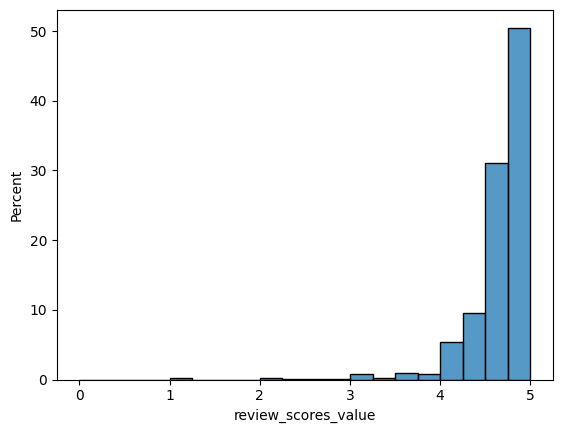

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

REVIEWS = [col for col in df.columns if 'review' in col.lower()]
# let's start by a simple description of our target variable(s)
 
print(df[REVIEWS].describe())

sns.histplot(df, x='review_scores_value', stat='percent', bins=20)
plt.show()
R = 'review_scores_value'

In [ ]:
print(len(df[df[R] <= 4]) / len(df)) # only 5 percent of the users have
df[[R]].skew()

0.053602952977050235


review_scores_value   -3.887285
dtype: float64

In [ ]:
# let's extract the reviews
reviews = pd.read_csv(os.path.join(ROME_DATA, 'reviews.csv'))

reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2737,24343517,2014-12-26,24333039,Raphaell,"This spot was in a great and nice area,walking..."
1,2737,24966779,2015-01-04,10493776,Ia,"Elif was really very helpful, while arranging ..."
2,2737,29770086,2015-04-12,29630601,Julia,"Elif's flat is spacious, clean, and had everyt..."
3,2737,30477570,2015-04-22,31215535,Sevil,I had a wonderful time staying with Elif and h...
4,2737,31659336,2015-05-08,1959813,Suzy,"Elif was a brilliant host, with an exceptional..."


In [ ]:
l = reviews.groupby(['listing_id'])['id'].count()
l.describe()

count    21152.000000
mean        62.343845
std         88.555587
min          1.000000
25%          7.000000
50%         26.000000
75%         81.000000
max       1424.000000
Name: id, dtype: float64